In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [2]:
numerical_columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris_df = pd.read_csv('./iris.data', header=None, names=[
  "sepal length (cm)",
  "sepal width (cm)",
  "petal length (cm)",
  "petal width (cm)",
  "class",
])
iris_np = iris_df[numerical_columns].to_numpy()
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 2.4. Characteristics Measures for mutidimensional data

### Covariance and correlation

for a single variable problem variance is defined as where $\bar{x}$ is the mean

$$v = \frac{1}{n-1}\sum^{i=n}_{i=1} (x-\bar{x})^2$$

for vector case we use this definition. in this case cross product already include the summation in its definition

$$V = \frac{1}{n-1}(X-\bar{X}) \times (X-\bar{X})^T$$

In [3]:
mean = iris_df[numerical_columns].mean()
mean

sepal length (cm)    5.843333
sepal width (cm)     3.054000
petal length (cm)    3.758667
petal width (cm)     1.198667
dtype: float64

In [4]:
covariance = (iris_df[numerical_columns] - mean).T @ (iris_df[numerical_columns] - mean)
covariance = covariance / ( len(iris_df) - 1 )
covariance

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.039268,1.273682,0.516904
sepal width (cm),-0.039268,0.188004,-0.321713,-0.117981
petal length (cm),1.273682,-0.321713,3.113179,1.296387
petal width (cm),0.516904,-0.117981,1.296387,0.582414


this covariance matrix will have this form 

\begin{pmatrix}
 s_{x}^2 & s_{xy} \\ 
 s_{xy} &  s_{y}^2
\end{pmatrix}

We can notice that diagonal in covariance matrix will match with variance for each of the individual columns 

In [5]:
iris_df[numerical_columns].var()

sepal length (cm)    0.685694
sepal width (cm)     0.188004
petal length (cm)    3.113179
petal width (cm)     0.582414
dtype: float64

To calc the correlation we use the Pearson's product moment correlation coeficient

$$ \frac{s_{xy}}{x_xs_y} $$

In [6]:
correlation_df = covariance.copy()
for index, row in covariance.iteritems():
  for cell in row.index:
    s_xy = row[cell]
    s_x = np.sqrt(covariance.loc[index, index])
    s_y = np.sqrt(covariance.loc[cell, cell])

    correlation_df.loc[index, cell] = s_xy / (s_x * s_y)
correlation_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544
petal length (cm),0.871754,-0.420516,1.000000,0.962757
petal width (cm),0.817954,-0.356544,0.962757,1.000000


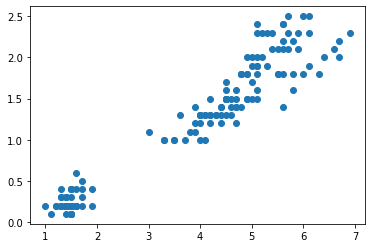

In [7]:
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'])
plt.show()

## 2.5 Principal Component Analysis

In [8]:
feat = ['petal length (cm)', 'petal width (cm)']

### Principal axes transformation

Let's center the dataset in 0 substracting the mean

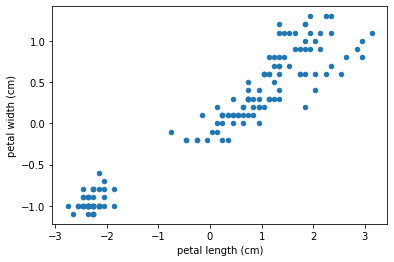

In [9]:
norm_iris_df = (iris_df[numerical_columns] - iris_df[numerical_columns].mean())
norm_iris_df.plot.scatter(*feat)
plt.show()

$$Ax = \lambda x$$

In [10]:
e_vals, e_vect = np.linalg.eig(covariance.loc[feat, feat])
e_vals, e_vect

(array([3.65937449, 0.03621925]),
 array([[ 0.92154695, -0.38826694],
        [ 0.38826694,  0.92154695]]))

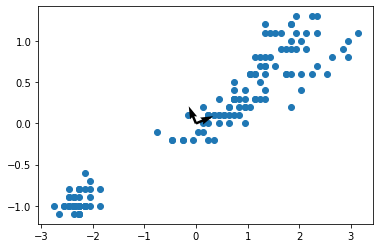

In [11]:
plt.scatter(norm_iris_df[feat[0]], norm_iris_df[feat[1]])
plt.quiver([0, 0], [0, 0], *e_vect)
plt.show()

### Projection

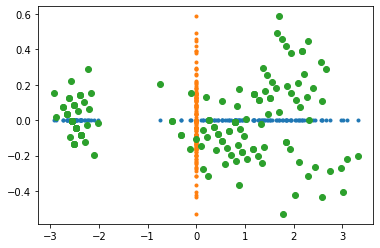

In [20]:
proj_1, proj_2 = (norm_iris_df[feat] @ e_vect).T.to_numpy()
plt.scatter(proj_1, np.zeros(150), marker='.')
plt.scatter(np.zeros(150), proj_2, marker='.')
plt.scatter(proj_1, proj_2)
plt.show()

### Sklearn

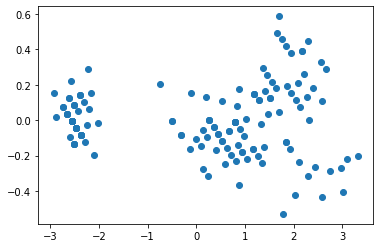

In [21]:
pca = PCA(n_components=2)
pca.fit(iris_df[feat])
proj = pca.fit_transform(iris_df[feat])

plt.scatter(*proj.T)
plt.show()

In [45]:
pca.components_

array([[ 0.92154695,  0.38826694],
       [-0.38826694,  0.92154695]])